##Функции

####мощность одновыборочного правостороннего теста

In [4]:
def zpower_1sample_data_monte_carlo(mu0,
                                    mu,
                                    sigma,
                                    sample_size,
                                    n_monte_carlo,
                                    significance_level = 0.05):

    rejections = 0

    for _ in range(n_monte_carlo):
        sample = sps.norm.rvs(loc=mu, scale=sigma, size=sample_size)
        test_stat, pvalue = ztest_1sample(pop_mean  = mu0,
                                          sample_mean = sample.mean(),
                                          sample_std=sample.std(),
                                          sample_size = len(sample),
                                          alternative = 'greater')

        if pvalue < significance_level:
            rejections += 1

    return rejections / n_monte_carlo

####z тест для одного сэмпла

In [5]:
#Z test one sample
def ztest_1sample(pop_mean,
                  sample_mean,
                  sample_std,
                  sample_size,
                  alternative='two-sided'):

    statistic = (sample_mean - pop_mean)/(sample_std / sample_size**0.5)

    if alternative == 'less':
        pvalue = sps.norm.cdf(statistic)

    if alternative == 'greater':
        pvalue = 1 - sps.norm.cdf(statistic)

    if alternative == 'two-sided':
        pvalue = 2 * (1 - sps.norm.cdf(abs(statistic)))
    return statistic, pvalue



def ztest_1sample_data(pop_mean, sample, alternative='two-sided'):
    return ztest_1sample(pop_mean, sample_mean = sample.mean(),
                         sample_std = sample.std(),
                         sample_size = len(sample),
                         alternative = alternative)

####z тест для дыух сэмплов

In [6]:
# z test two sample
def ztest_2sample(sample1_mean,
                  sample2_mean,
                  sample1_std,
                  sample2_std,
                  sample1_size,
                  sample2_size,
                  alternative='two-sided'):

    statistic = (sample1_mean - sample2_mean) / (sample1_std ** 2 / sample1_size + sample2_std ** 2 / sample2_size) ** 0.5

    if alternative == 'less':
        pvalue = sps.norm.cdf(statistic)

    if alternative == 'greater':
        pvalue = 1 - sps.norm.cdf(statistic)

    if alternative == 'two-sided':
        pvalue = 2 * (1 - sps.norm.cdf(abs(statistic)))

    return statistic, pvalue



def ztest_2sample_data(sample1,
                       sample2,
                       alternative='two-sided'):

    return ztest_2sample(sample1_mean = sample1.mean(),
                         sample2_mean = sample2.mean(),
                         sample1_std = sample1.std(),
                         sample2_std = sample2.std(),
                         sample1_size = len(sample1),
                         sample2_size = len(sample2),
                         alternative = alternative)

#Синий уровень

импорты, загрузка df и очистка

In [7]:
import pandas as pd
from scipy import stats
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')
df['Gender'] = df['Gender'].apply(lambda x: x.lower())
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [8]:
df.sort_values(by='Profit')

,Payments,Costs,Profit,Age,Gender,AgeGroup
2759,17750,9661700,-9643950,35,male,25-39
3179,6750,16950,-10200,33,male,25-39
4698,6800,16600,-9800,36,female,25-39
8572,8400,15550,-7150,25,female,25-39
606,7350,14350,-7000,28,female,25-39
...,...,...,...,...,...,...
6378,143400,39500,103900,22,male,18-24
7408,137950,32700,105250,21,male,18-24
8420,139100,33150,105950,22,male,18-24
2941,145250,35750,109500,21,male,18-24


In [9]:
df = df[(df['Profit'] < 200_000) & (df['Profit'] > -200_000)]
df.sort_values(by='Profit')

,Payments,Costs,Profit,Age,Gender,AgeGroup
3179,6750,16950,-10200,33,male,25-39
4698,6800,16600,-9800,36,female,25-39
8572,8400,15550,-7150,25,female,25-39
606,7350,14350,-7000,28,female,25-39
5457,3750,10000,-6250,18,male,18-24
...,...,...,...,...,...,...
1995,137500,33750,103750,21,male,18-24
6378,143400,39500,103900,22,male,18-24
7408,137950,32700,105250,21,male,18-24
8420,139100,33150,105950,22,male,18-24


###Синий1

In [10]:
df.shape

(8713, 6)

In [11]:
sum(df['Profit'] > 15_000) / len(df) #доля окупившихся клиентов клиентов

0.3544129461723861

In [12]:
df['Profit'].mean() #средний доход

15755.095833811545

In [13]:
df['Profit'].mean() - 15_000 #средняя прибыль

755.0958338115452

$H_0$ клиент не окупился(Profit меньше затрат на привлечение)

$H_1$ клиент окупился(Profit побльше затрат на привлечение)

In [14]:
profit_avg_all = df['Profit'].mean()
z_1, p_value_1 = ztest_1sample_data(pop_mean = 15_000,
                                   sample = df['Profit'],
                                   alternative = 'greater')

print(f'z test: {z_1.round(5)}\np-value: {p_value_1.round(5) * 100}%')

z test: 3.50211
p-value: 0.023%


###Синий2

,Profit
Женщины,26278.373894
Мужчины,13155.762435


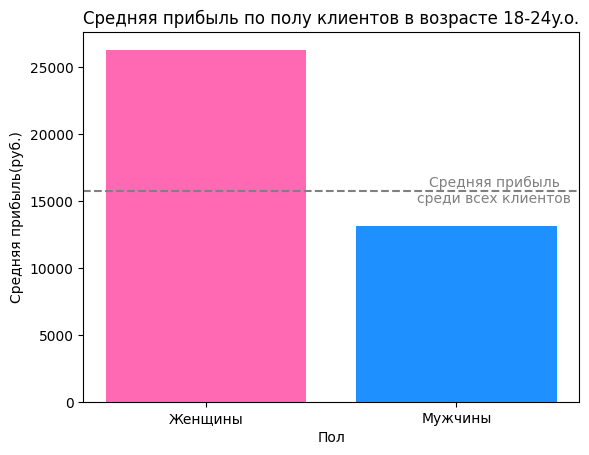

In [15]:
 # повторяем
grouped = df.groupby(['AgeGroup','Gender'])
AgG_Gen_Pr_Groupby = grouped.agg({'Profit': 'mean'})
AgG_Gen_Pr_Groupby.index = [f"{item[1].capitalize()} / {item[0]} y.o." for item in AgG_Gen_Pr_Groupby.index]

axisX = AgG_Gen_Pr_Groupby.iloc[:2]
axisX = axisX.rename(index = { 'Female / 18-24 y.o.' : 'Женщины', 'Male / 18-24 y.o.' : 'Мужчины'})
plt.bar(x = axisX.index , height = axisX['Profit'].values, color = ['hotpink', 'dodgerblue'])

#называяем оси и график
plt.xlabel("Пол")
plt.ylabel("Средняя прибыль(руб.)")
plt.title("Средняя прибыль по полу клиентов в возрасте 18-24y.o.")

#наносим линию среднего профита
plt.axhline(y=15755.095833811545, linestyle='--', color='gray')
plt.text(x=1.15, y=15755.095833811545 , s='''Средняя прибыль
среди всех клиентов''', ha='center', va='center', color='gray')

#сохраняем в формате png
plt.savefig('график мж 18-24.png')


axisX

In [16]:
df

,Payments,Costs,Profit,Age,Gender,AgeGroup
0,9400,8100,1300,19,male,18-24
1,26600,13900,12700,29,male,25-39
2,9750,6750,3000,20,male,18-24
3,29700,11200,18500,18,female,18-24
4,49700,10450,39250,21,female,18-24
...,...,...,...,...,...,...
8710,8650,8600,50,18,male,18-24
8711,45350,14350,31000,19,female,18-24
8712,41700,9900,31800,18,female,18-24
8713,120600,49650,70950,21,male,18-24


$H_0 : \mu_1 = \mu2$

$H_1 : \mu_1 \neq \mu2$

In [17]:
df_18_24_m = df[(df['AgeGroup'] == '18-24') & (df['Gender'] == 'male')]
df_18_24_f = df[(df['AgeGroup'] == '18-24') & (df['Gender'] == 'female')]

z_st, p_value = ztest_2sample_data(sample1 = df_18_24_m['Profit'],
                                   sample2 = df_18_24_f['Profit'],
                                   alternative = 'two-sided')

print(f'p-value: {p_value}')

p-value: 0.0


для мужчин 18-24

In [18]:
profit_avg_all = df['Profit'].mean()
z_1, p_value_1 = ztest_1sample_data(pop_mean = 15_000,
                                   sample = df_18_24_m['Profit'],
                                   alternative = 'greater')

print(f'z test: {z_1.round(5)}\np-value: {p_value_1.round(5) * 100}%')

z test: -4.06508
p-value: 99.998%


для женщин 18-24

In [19]:
profit_avg_all = df['Profit'].mean()
z_1, p_value_1 = ztest_1sample_data(pop_mean = 15_000,
                                   sample =  df_18_24_f['Profit'],
                                   alternative = 'greater')

print(f'z test: {z_1.round(5)}\np-value: {p_value_1 * 100}%')

z test: 66.48343
p-value: 0.0%


#Красный уровень

###Доп графики

Text(0.5, 1.0, 'Кол-во клиентов с определенным Profit в категории женщин 18-24 лет')

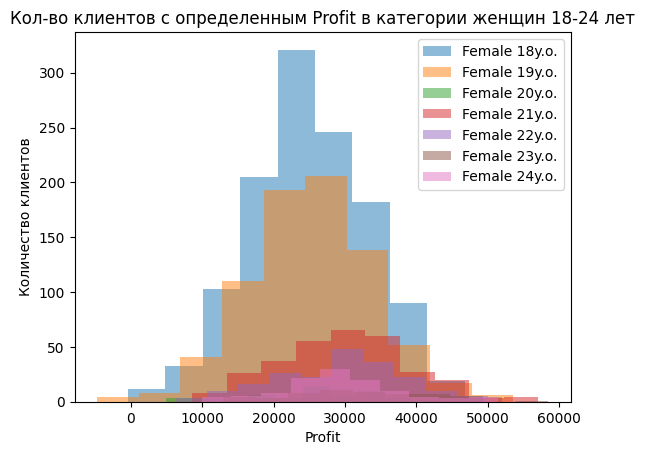

In [20]:
for age in range(18,25):
    plt.hist(df_18_24_f[df_18_24_f['Age'] == age]['Profit'], alpha = 0.5, label= f'Female {age}y.o.')
plt.legend()
plt.ylabel('Количество клиентов')
plt.xlabel('Profit')
plt.title('Кол-во клиентов с определенным Profit в категории женщин 18-24 лет')

Text(0.5, 1.0, 'Средний профит для всех возрастов в категории женщин 18-24 лет')

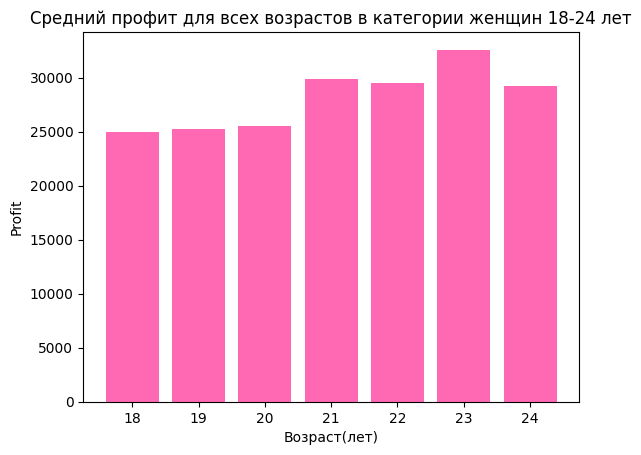

In [21]:
bars = []
X_marks = []
for age in range(18,25):
    X_marks.append(age)
    bars.append(df_18_24_f[df_18_24_f['Age'] == age]['Profit'].mean())

plt.bar(x = X_marks, height = bars, color = 'hotpink')
plt.xlabel('Возраст(лет)')
plt.ylabel('Profit')
plt.title('Средний профит для всех возрастов в категории женщин 18-24 лет')

###Расчеты

разбиваем на новые поло возрастные категории

In [22]:
df_18_21_f = df_18_24_f[(df_18_24_f['Age'] <=21)]
df_22_24_f = df_18_24_f[(df_18_24_f['Age'] >=22)]
df_18_21_f['Age'].unique(), df_22_24_f['Age'].unique()

(array([18, 21, 19, 20]), array([22, 23, 24]))

$H_0 : \mu_1 = \mu2$

$H_1 : \mu_1 \neq \mu2$

In [23]:
z_st, p_value = ztest_2sample_data(sample1 = df_18_21_f['Profit'],
                                   sample2 = df_22_24_f['Profit'],
                                   alternative = 'two-sided')

print(f'p-value: {p_value}')

p-value: 0.0


для женщин 18-21

In [24]:
z_1, p_value_1 = ztest_1sample_data(pop_mean = 15_000,
                                   sample = df_18_21_f['Profit'],
                                   alternative = 'greater')

print(f'z test: {z_1.round(5)}\np-value: {p_value_1 * 100}%')

z test: 59.57085
p-value: 0.0%


для женщин 22-24

In [25]:
z_1, p_value_1 = ztest_1sample_data(pop_mean = 15_000,
                                   sample =  df_22_24_f['Profit'],
                                   alternative = 'greater')

print(f'z test: {z_1.round(5)}\np-value: {p_value_1 * 100}%')

z test: 32.50075
p-value: 0.0%


средний профит в этих категориях

In [26]:
df_18_21_f['Profit'].mean(), df_22_24_f['Profit'].mean()

(25716.510438858117, 29891.23287671233)

размеры выборок

In [27]:
len(df_18_21_f), len(df_22_24_f)

(2347, 365)

стандартное отклонение

In [28]:
df_18_21_f['Profit'].std(), df_22_24_f['Profit'].std()

(8715.176171686686, 8753.538836216921)

In [29]:
1 - 0.95 ** 21

0.6594383737118852

In [30]:
alpha = 0.05
while 1:
    alpha -= 0.00001
    if 1 - (1 - alpha) ** 21 < 0.05:
        print(alpha, 1 - (1 - alpha) ** 21)
        break

0.002429999999995375 0.04980884807520425


In [31]:
0.0024 * 21

0.05039999999999999

#Черный уровень

###2

в первом кейсе "Золотая жила", золотой жилой была категория мужчины 21-24

age: 18   profit: 2096
age: 19   profit: 2040
age: 20   profit: 1919
age: 21   profit: 78856
age: 22   profit: 80067
age: 23   profit: 80548
age: 24   profit: 78583
age: 25   profit: 7534
age: 26   profit: 7684
age: 27   profit: 7850


<BarContainer object of 10 artists>

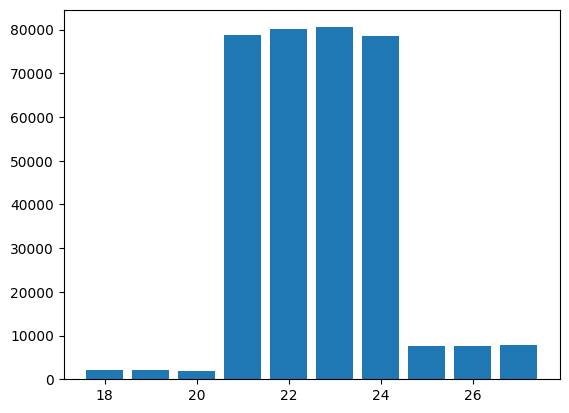

In [32]:
bars= []
ages_for_bars = []


for age in range(18,28):
    mean_profit_by_age = df[(df['Age'] == age) & (df['Gender'] == 'male')]['Profit'].mean()
    print(f'age: {age}   profit: {int(mean_profit_by_age)}')

    ages_for_bars.append(age)
    bars.append(mean_profit_by_age)


plt.bar(height=bars, x=ages_for_bars)

In [33]:
df_gold_mine = df[(df['Age'] >= 21) & (df['Age'] <= 24) & (df['Gender'] == 'male')]
df_gold_mine

,Payments,Costs,Profit,Age,Gender,AgeGroup
9,111400,35650,75750,21,male,18-24
67,128950,40150,88800,21,male,18-24
80,116550,44850,71700,24,male,18-24
90,126500,41650,84850,23,male,18-24
99,133150,33500,99650,23,male,18-24
...,...,...,...,...,...,...
8604,100200,40450,59750,21,male,18-24
8608,120900,42650,78250,21,male,18-24
8634,103350,35100,68250,22,male,18-24
8657,125400,32700,92700,23,male,18-24


In [34]:
z_st, p_value = ztest_2sample_data(sample1 = df_18_24_f['Profit'],
                                   sample2 = df_gold_mine['Profit'],
                                   alternative = 'two-sided')

print(f'p-value: {p_value}')

p-value: 0.0


###3

####Неверно

In [35]:
df_18_m = df[(df['Gender'] == 'male') & (df['Age'] == 18)]
df_18_m

,Payments,Costs,Profit,Age,Gender,AgeGroup
5,14300,7500,6800,18,male,18-24
8,10300,7700,2600,18,male,18-24
13,10450,7650,2800,18,male,18-24
14,9300,8800,500,18,male,18-24
22,8950,7300,1650,18,male,18-24
...,...,...,...,...,...,...
8690,7200,9550,-2350,18,male,18-24
8691,7250,6400,850,18,male,18-24
8707,10500,7550,2950,18,male,18-24
8708,5600,9250,-3650,18,male,18-24


средний профит от мужчин 18 лет

In [36]:
df_18_m['Profit'].mean()

2096.6666666666665

мощность

In [37]:
sigma = df_18_m['Profit'].std()
1 - sps.norm(df_18_m['Profit'].mean(), sigma).cdf(15_000)

6.4150553757968964e-09

In [38]:
for effect in range(0,50_000):
    power = 1 - sps.norm.cdf(15_000, df_18_m['Profit'].mean() + effect, sigma)
    if  power > 0.8:
        print(f'effect: {effect - 1} power: {power}')
        break

effect: 14812 power: 0.8000664046525492


In [39]:
for effect in range(0,50_000):
    power = 1 - sps.norm.cdf(15_000 - effect, df_18_m['Profit'].mean(), sigma)
    if  power > 0.8:
        print(f'effect: {effect - 1} power: {power}')
        break

effect: 14812 power: 0.800066404652549


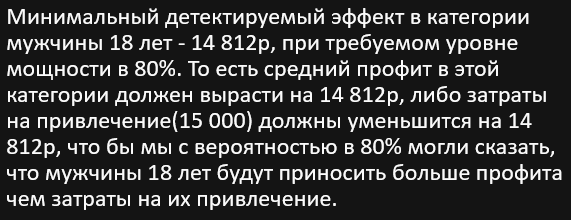

In [40]:
z_1, p_value_1 = ztest_1sample_data(pop_mean = 15_000 - 14_812,
                                   sample = df_18_m['Profit'],
                                   alternative = 'greater')

print(f'z test: {z_1.round(5)}\np-value: {p_value_1 * 100}%')

z test: 32.7505
p-value: 0.0%


####Верно



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>минимально детектируемый эффект дл мужчин 18 лет





Гипотеза, проверяемая в одновыборочном тесте: <br>
$H_0: \mu_{19} = 15000$ — средняя прибыль равняется стоимости привлечения. <br>
$H_1: \mu_{19} > 15000$ — средняя прибыль больше стоимости привлечения.

In [ ]:
man_18 = df[(df['Gender'] == 'male') & (df['Age'] == 18)].copy()

In [50]:
def zpower_1sample_data_monte_carlo(mu0, mu, sigma, sample_size, n_monte_carlo, significance_level=0.05):
    rejections = 0

    for _ in range(n_monte_carlo):
        sample = sps.norm.rvs(loc=mu, scale=sigma, size=sample_size)

        test_stat, pvalue = ztest_1sample(pop_mean=mu0,
                                          sample_mean=sample.mean(),
                                          sample_std=sample.std(),
                                          sample_size=len(sample),
                                          alternative='greater')
        if pvalue < significance_level:
            rejections += 1

    return rejections / n_monte_carlo

In [58]:
for effect in np.arange(0, 500, 1):
    if zpower_1sample_data_monte_carlo(mu0=15000,
                                       mu=15000 + effect,
                                       sigma=man_18['Profit'].std(),
                                       sample_size=len(man_18['Profit']),
                                       n_monte_carlo=1000) >= 0.8:
        print('Минимально детектируемый эффект:', effect)
        break

Минимально детектируемый эффект: 144


In [59]:
ztest_1sample(15000, 15245, man_18['Profit'].std(), len(man_18['Profit']), alternative='greater')

(4.203914823801915, 1.3116884558850295e-05)

###1

Для серии тестов скорректируем уровень значимости на количество тестов в серии: 0.004545 вместо 0.05.

In [45]:
sign_lvl = 0.05 / 7
sign_lvl

0.0071428571428571435

In [49]:
man_18 = df[(df['Gender'] == 'male') & (df['Age'] == 18)].copy()
man_19 = df[(df['Gender'] == 'male') & (df['Age'] == 19)].copy()
man_20 = df[(df['Gender'] == 'male') & (df['Age'] == 20)].copy()
man_21 = df[(df['Gender'] == 'male') & (df['Age'] == 21)].copy()
man_22 = df[(df['Gender'] == 'male') & (df['Age'] == 22)].copy()
man_23 = df[(df['Gender'] == 'male') & (df['Age'] == 23)].copy()
man_24 = df[(df['Gender'] == 'male') & (df['Age'] == 24)].copy()
man_18['Profit'].mean(), man_19['Profit'].mean(), man_20['Profit'].mean(), man_21['Profit'].mean(), man_22['Profit'].mean(), man_23['Profit'].mean(), man_24['Profit'].mean()

(2096.6666666666665,
 2040.1025641025642,
 1919.8484848484848,
 78856.54362416107,
 80067.0,
 80548.23529411765,
 78583.69565217392)

ищем примерно мин детект эффект с шагом 5

In [60]:
for effect in np.arange(0, 1000, 5):
    if zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_18['Profit'].std(), sample_size=len(man_18['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_19['Profit'].std(), sample_size=len(man_19['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_20['Profit'].std(), sample_size=len(man_20['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_21['Profit'].std(), sample_size=len(man_21['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_22['Profit'].std(), sample_size=len(man_22['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_23['Profit'].std(), sample_size=len(man_23['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_24['Profit'].std(), sample_size=len(man_24['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8:
        print('Минимально детектируемый эффект:', effect)
        break

Минимально детектируемый эффект: 190


ищем более точно

In [61]:
for effect in np.arange(185, 1000, 1):
    if zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_18['Profit'].std(), sample_size=len(man_18['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_19['Profit'].std(), sample_size=len(man_19['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_20['Profit'].std(), sample_size=len(man_20['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_21['Profit'].std(), sample_size=len(man_21['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_22['Profit'].std(), sample_size=len(man_22['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_23['Profit'].std(), sample_size=len(man_23['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8 \
    or zpower_1sample_data_monte_carlo(mu0=15000, mu=15000 + effect, sigma=man_24['Profit'].std(), sample_size=len(man_24['Profit']), n_monte_carlo=1000, significance_level=sign_lvl) >= 0.8:
        print('Минимально детектируемый эффект:', effect)
        break

Минимально детектируемый эффект: 193
